# RELATIONSHIP ANALYSIS

## TABLE OF CONTENT

|S/N| CONTENT                                       |
|---|---------------------------------------------- |
|1| [RELATIONSHIP ANALYSIS](#relationship)          |
|2| [REFERENCE](#reference)                         |

## Ground Rules to Follow

- Sign up on [Ananconda Cloud](https://anaconda.cloud/)
- Navigate to you notebook side of the website.
- 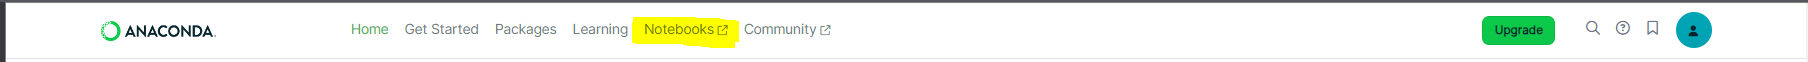
- Create a folder and import the files from the Team's folder.
- Run your notebook along.

### RELATIONSHIP ANALYSIS <a class="anchor" id="relationship"></a>

Establishing the realtionship between two or more variable is very key in the understanding of the complex relationship in complex datssets.

Let's look at some key ways to understand the varaible relationships:

- Univariate Analysis
- Bivariate Analysis
- Multivariate Analysis

#### Univariate Analysis

What is Univariate Analysis ?

Univariate analysis is the technique of comparing and analyzing the dependency of a single predictor and a response variable. 
The prefix "uni" means one, emphasizing the fact that the analysis only accounts for one variable's effect on a dependent variable. 
Univariate Analysis is thought to be one of the simplest forms of data analysis as it doesn't deal with causes or relationships, like a regression would. 
Primarily, Univariate Analysis simply takes data and provides a summary and associated patterns. 

In [3]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

In [4]:
df= pd.read_csv(r"C:\Users\hp\Documents\Codes\projects\my_git\iLearn-DS\data\clean_dataset.csv")
print(df.head())

   Gender    Age   Debt  Married  BankCustomer     Industry Ethnicity  \
0       1  30.83  0.000        1             1  Industrials     White   
1       0  58.67  4.460        1             1    Materials     Black   
2       0  24.50  0.500        1             1    Materials     Black   
3       1  27.83  1.540        1             1  Industrials     White   
4       1  20.17  5.625        1             1  Industrials     White   

   YearsEmployed  PriorDefault  Employed  CreditScore  DriversLicense  \
0           1.25             1         1            1               0   
1           3.04             1         1            6               0   
2           1.50             1         0            0               0   
3           3.75             1         1            5               1   
4           1.71             1         0            0               0   

        Citizen  ZipCode  Income  Approved  
0       ByBirth      202       0         1  
1       ByBirth       43     560

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    int64  
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   Industry        690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int64  
 9   Employed        690 non-null    int64  
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    int64  
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    int64  
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 86.4+ KB
None


In [6]:
# check duplicated rows
df.duplicated().sum()

0

In [7]:
# drop some columns
df.drop(['ZipCode', 'Citizen', 'DriversLicense'], axis=1)

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,21.08,10.085,0,0,Education,Black,1.25,0,0,0,0,0
686,0,22.67,0.750,1,1,Energy,White,2.00,0,1,2,394,0
687,0,25.25,13.500,0,0,Healthcare,Latino,2.00,0,1,1,1,0
688,1,17.92,0.205,1,1,ConsumerStaples,White,0.04,0,0,0,750,0


Starting with the univariate analysis of continuous variables. We will first use the describe function to get the descriptive statistics of continuous variables.

In [8]:
df[['Age','Debt','YearsEmployed','CreditScore','Income']].describe()

,Age,Debt,YearsEmployed,CreditScore,Income
count,690.000000,690.000000,690.000000,690.00000,690.000000
mean,31.514116,4.758725,2.223406,2.40000,1017.385507
std,11.860245,4.978163,3.346513,4.86294,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000
25%,22.670000,1.000000,0.165000,0.00000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,5.000000
75%,37.707500,7.207500,2.625000,3.00000,395.500000
max,80.250000,28.000000,28.500000,67.00000,100000.000000


The describe method - is a function ran on the selected columns, it helps us get the mean, std, min, max, 25th percentile, 50th percentile, and 75% percentile values of the columns.

<Axes: xlabel='Age', ylabel='Count'>

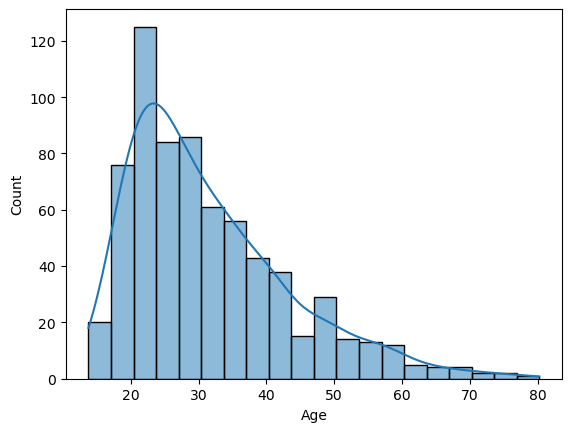

In [9]:
sns.histplot(df['Age'], kde=True)

In [10]:
lowerage = df['Age'] < 40

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


<Axes: xlabel='Age', ylabel='Count'>

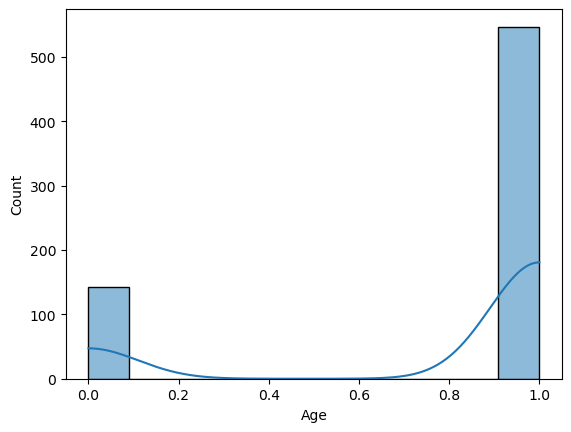

In [11]:
sns.histplot(lowerage, kde=True)

The above histogram shows that people tend to apply for credit cards at a very early stage of their careers. The lower frequency in the region above 10 YOE may be due to the reason that people apply for credit cards in an early stage of their careers. Hence, they possess credit cards when they are professionally experienced (>10 YOE).

Univariate Analysis of Categorical Variables

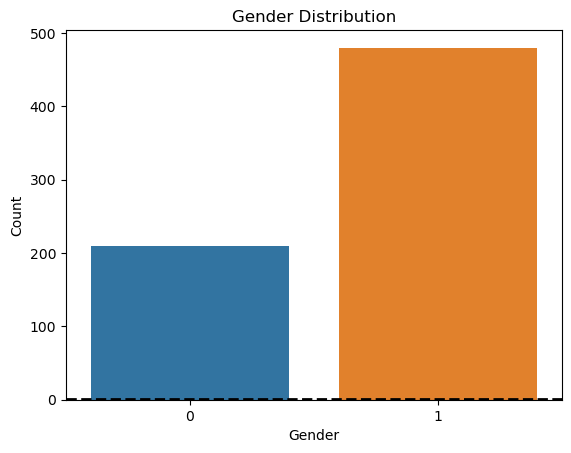

In [12]:
sns.countplot(data=df, x='Gender')

# Add a horizontal line
plt.axhline(y=0.5, color='black', linestyle='--', linewidth=2)

# Customize the plot as needed 
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')

# Show the plot
plt.show()

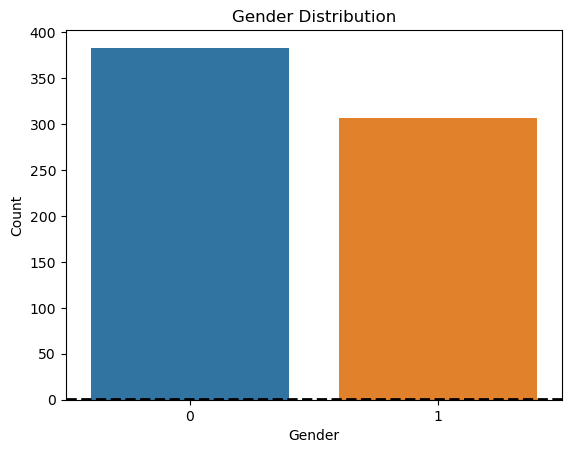

In [13]:
sns.countplot(data=df, x='Approved')

# Add a horizontal line
plt.axhline(y=0.5, color='black', linestyle='--', linewidth=2)

# Customize the plot as needed 
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')

# Show the plot
plt.show()

Observations:

- Males (Gender -1 ) applied more than women (Gender -0) did.
- People having bank accounts applied more than people who don’t have bank accounts. This cause no surprise.
- The trend in ethnicit ymight be due to the region the data was collected from.
- The majority of applications were rejected, i.e., less than 50% of the applications were approved.

#### Bivariate Analysis

Bivariate analysis is slightly more analytical than Univariate analysis. When the data set contains two variables and researchers aim to undertake comparisons between the two data set then Bivariate analysis is the right type of analysis technique.

In [14]:
# select some colums and get the correlation
df[['Age','Debt','YearsEmployed','CreditScore','Income']].corr()

,Age,Debt,YearsEmployed,CreditScore,Income
Age,1.000000,0.202177,0.391464,0.187327,0.018719
Debt,0.202177,1.000000,0.298902,0.271207,0.123121
YearsEmployed,0.391464,0.298902,1.000000,0.322330,0.051345
CreditScore,0.187327,0.271207,0.322330,1.000000,0.063692
Income,0.018719,0.123121,0.051345,0.063692,1.000000


(0.0, 20000.0)

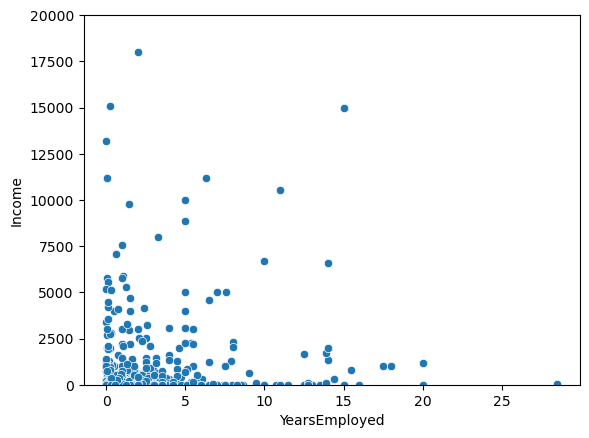

In [21]:
sns.scatterplot(data=df, x='YearsEmployed', y='Income')
plt.ylim(0, 20000)

Observation:
    
The points in the above scatter plot don’t follow any specific pattern. This might be due to people applying for cards coming from different professions with varying payscales

#### Bivariate Analysis for Categorical vs Continuous VAriables

We will use the ‘Approved’ column of the data as the categorical variable for our analysis. Comparing the column ‘Approved’ column with other columns can provide us with some useful insights.

GroupBy: First, we will perform the GroupBy operation on the continuous variables. Groupby allows us to split our data into separate groups to perform computations for better analysis

In [26]:
df.groupby(by='Approved').agg('mean',numeric_only=True )[['Age','Debt','YearsEmployed','CreditScore','Income']]

,Age,Debt,YearsEmployed,CreditScore,Income
Approved,,,,,
0,29.773029,3.839948,1.257924,0.631854,198.605744
1,33.686221,5.904951,3.427899,4.605863,2038.859935


KDE Plots with Hue: 
    
A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analogous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.

We will plot KDE plots of continius variables with hue=’Approved’

<Axes: xlabel='Age', ylabel='Density'>

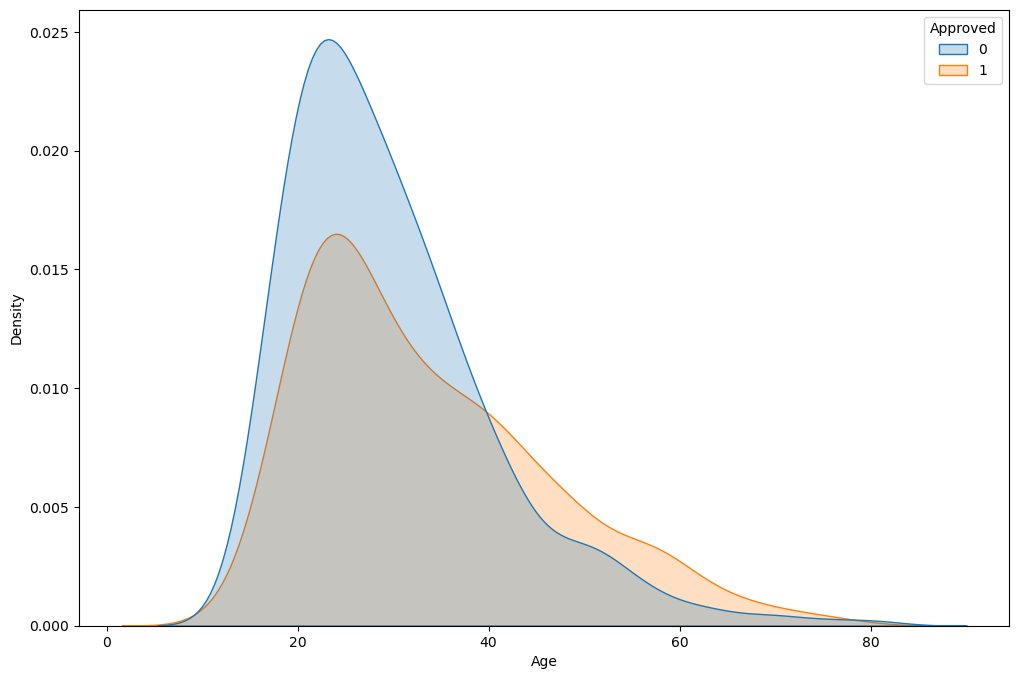

In [28]:
plt.figure(figsize=(12,8))
sns.kdeplot(data=df,x='Age', hue='Approved', fill=True)

<Axes: xlabel='CreditScore', ylabel='Density'>

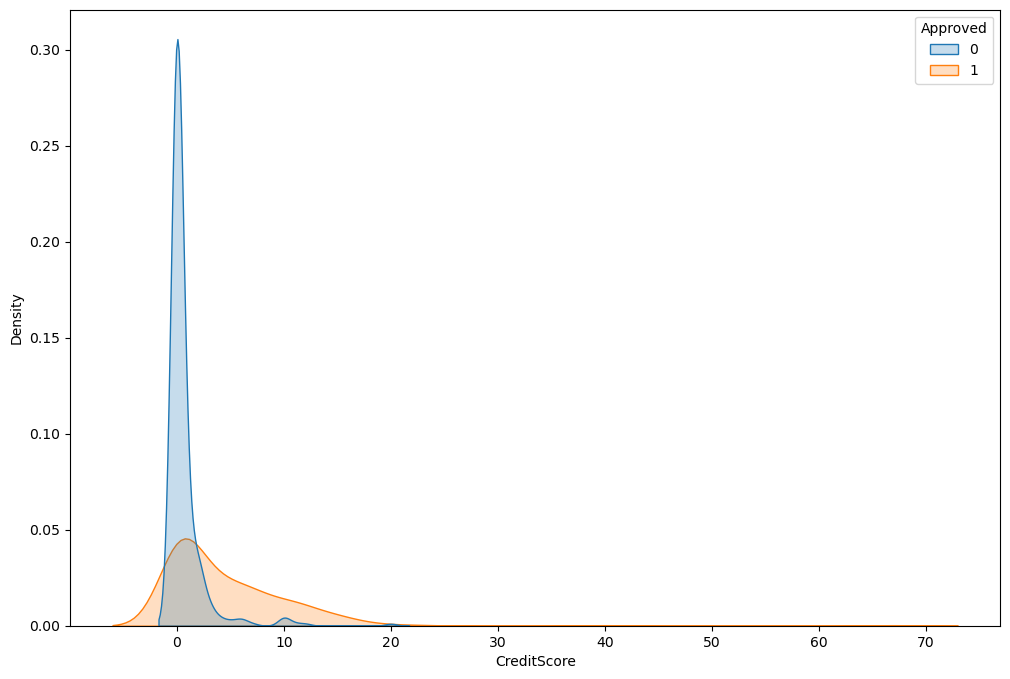

In [29]:
plt.figure(figsize=(12,8))
sns.kdeplot(data=df, x='CreditScore', hue='Approved', fill=True)

#### Bivariate Analysis of Categorical Variables vs Categorical Variables:

Now we will try to see the relationship between categorical variables. Again we will keep the ‘Approved’ column fixed and will compare it with other columns.

Countplot with Hue: We will plot count plots of categorical variables with Hue=’Approved’

<Axes: xlabel='Approved', ylabel='count'>

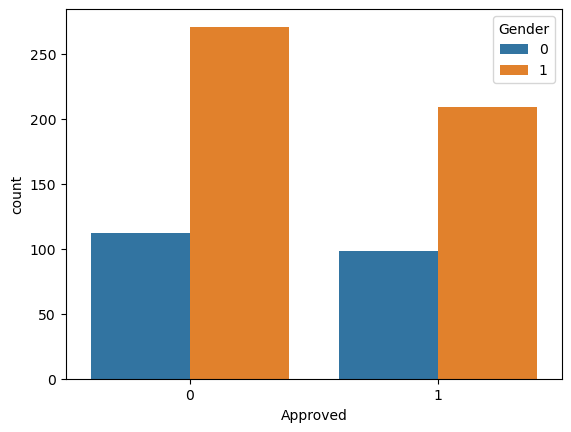

In [31]:
sns.countplot(data=df, x='Approved', hue='Gender')

#### Multivariate Analysis

What is Multivariate Analysis ?

Multivariate analysis is a process of comparing and analyzing the dependency of multiple variables over each other. 
For example, we can perform bivariate analysis of combination of two continuous features and find a relationship between them.

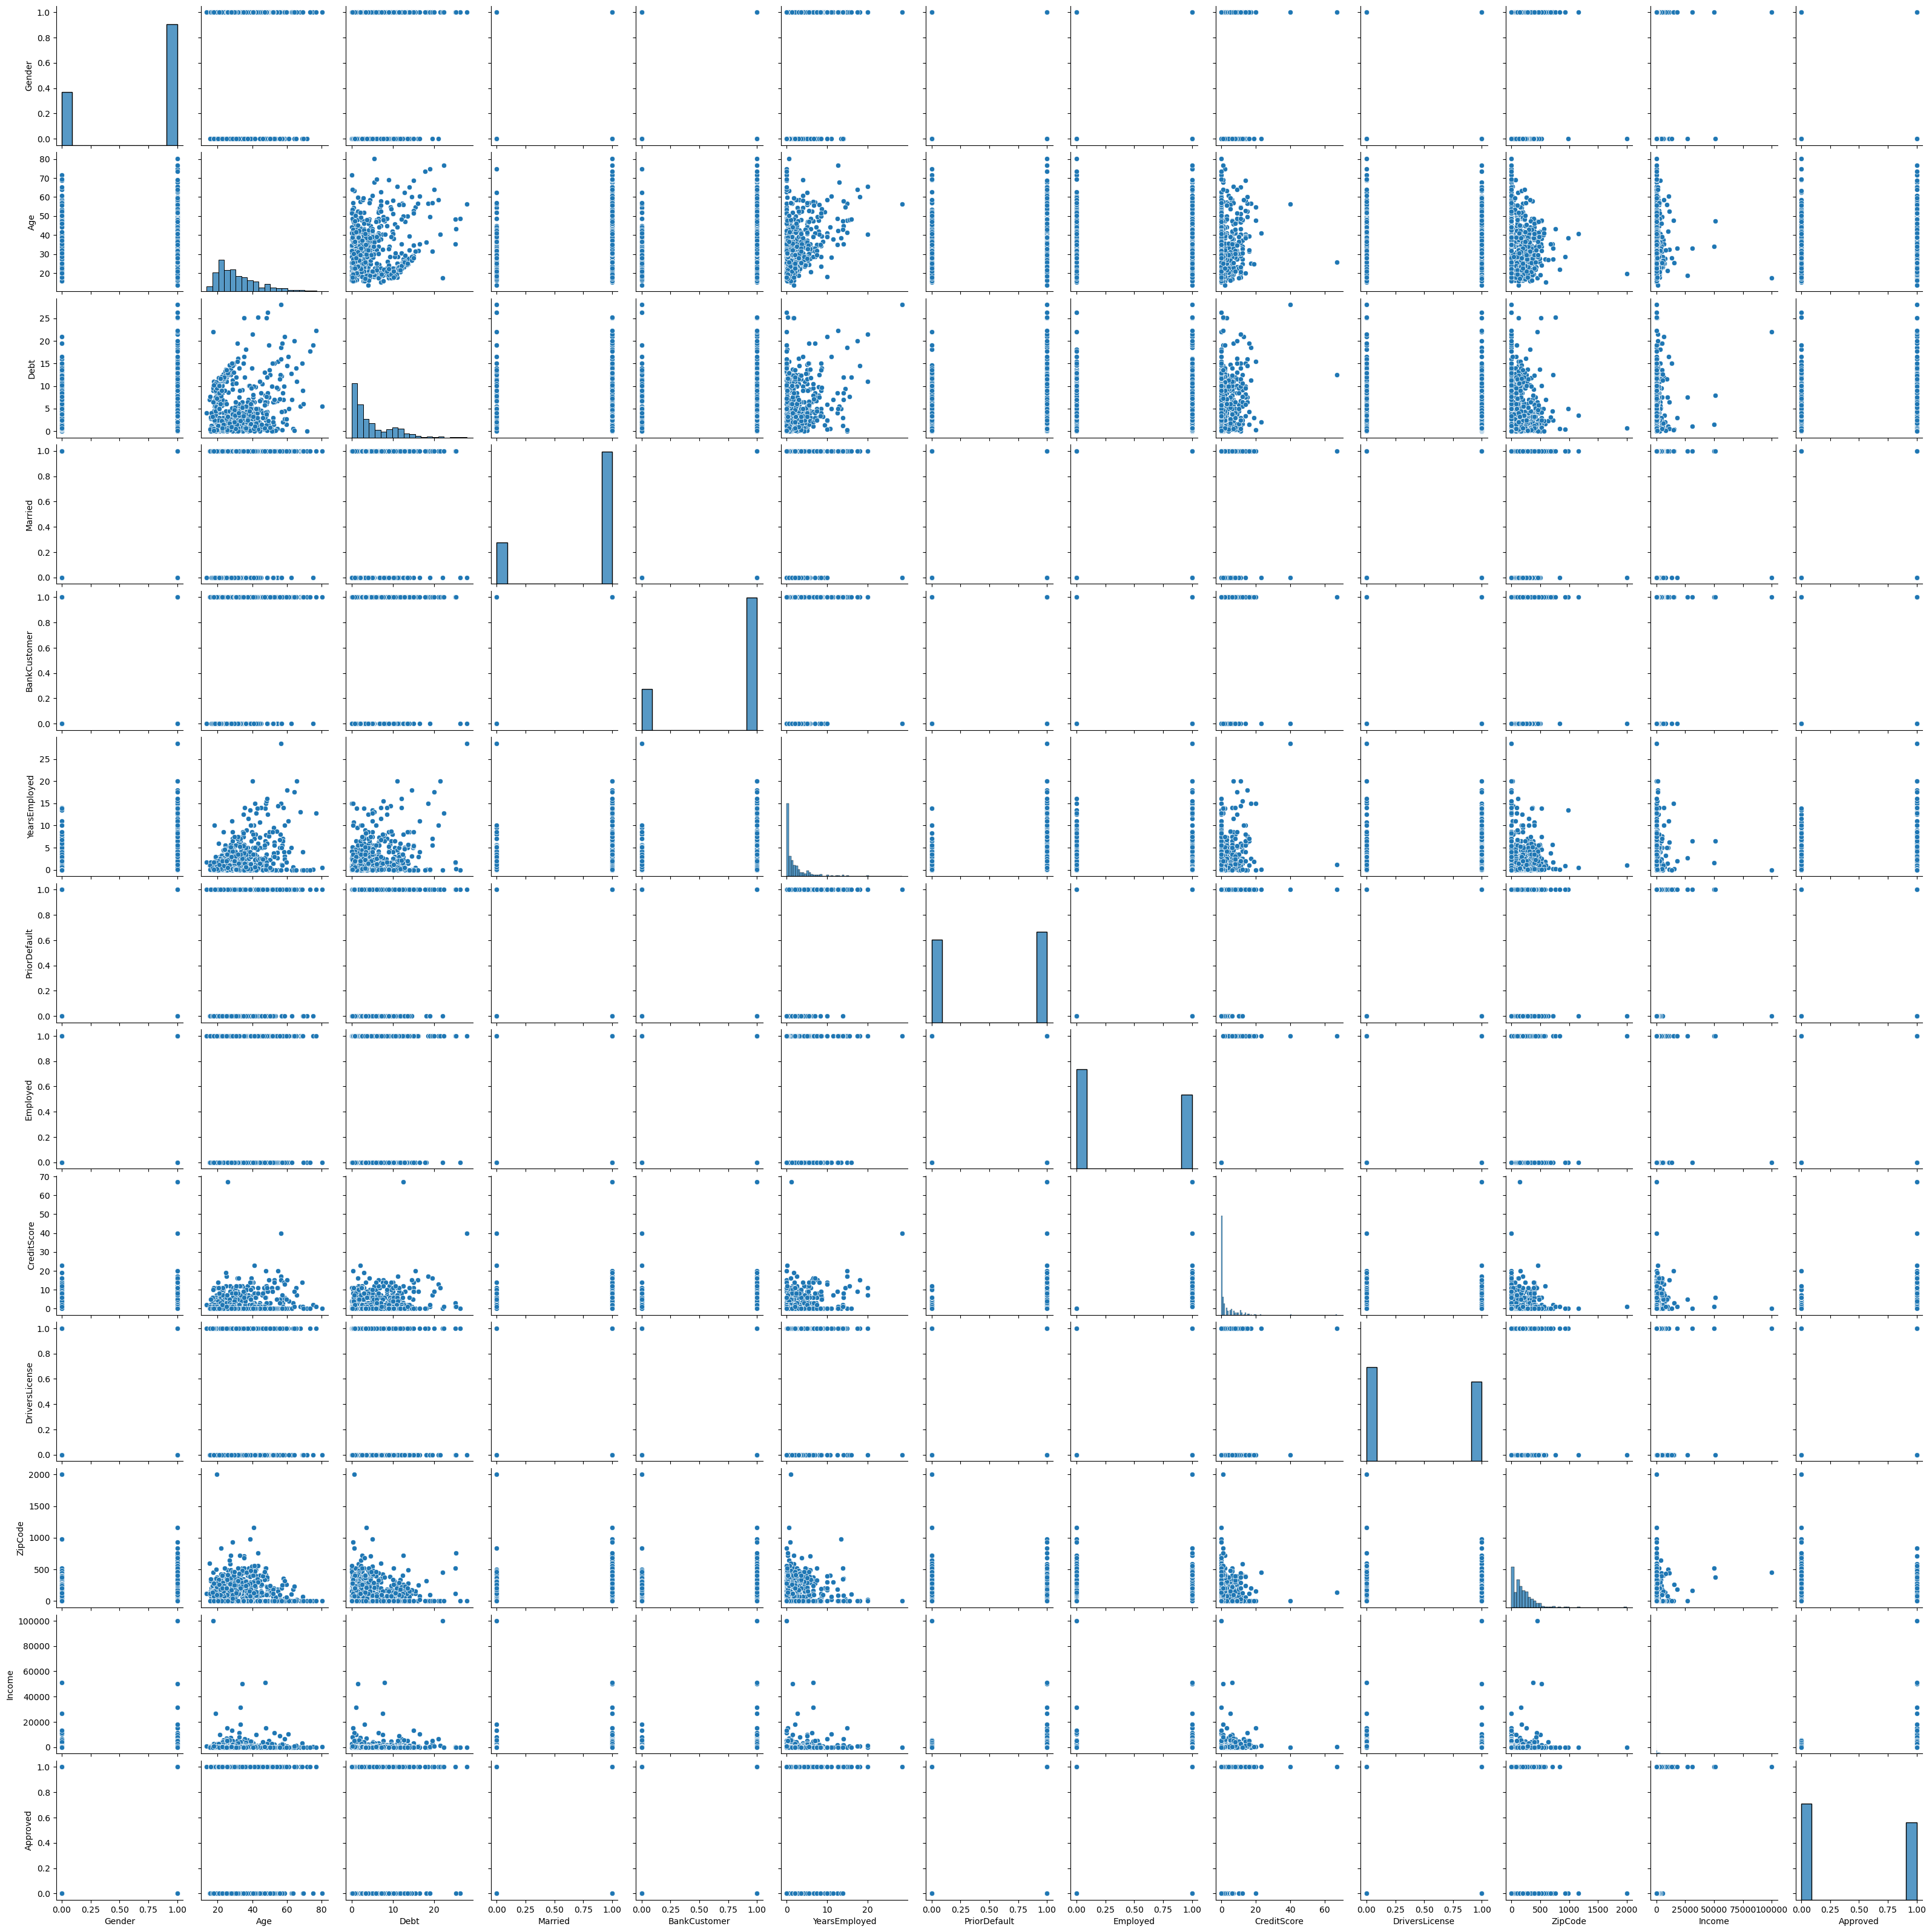

In [22]:
sns.pairplot(df)

|S/N| links                                                                            |
|---|--------------------------------------------------------------------------------- |
|1  |https://docs.python.org/3/tutorial/introduction.html                              |
|2  |https://apps.cognitiveclass.ai/learning/course                                    |
|3  |https://medium.com/mlearning-ai/univariate-bivariate-and-multivariate-data-analysis-in-python-341493c3d173                                                  |